In [2]:
#byCity dataset
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCity.csv')

#1. find out the city average year temperature, 


# convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# group the data by City and year, and calculate the mean of Avg_Temperature for each group
city_year_avg_temp = df.groupby([df['City'], df['Date'].dt.year])['Avg_Temperature'].mean().reset_index()

city_year_avg_temp.set_index('Date', inplace=True)


# print the resulting dataframe
print(city_year_avg_temp)


          City  Avg_Temperature
Date                           
1743  A Coruña        10.779000
1744  A Coruña        13.678125
1745  A Coruña         9.170500
1750  A Coruña        13.489273
1751  A Coruña        13.698500
...        ...              ...
2009    Ürümqi         7.287417
2010    Ürümqi         6.650083
2011    Ürümqi         6.806083
2012    Ürümqi         6.600167
2013    Ürümqi         9.472000

[682072 rows x 2 columns]


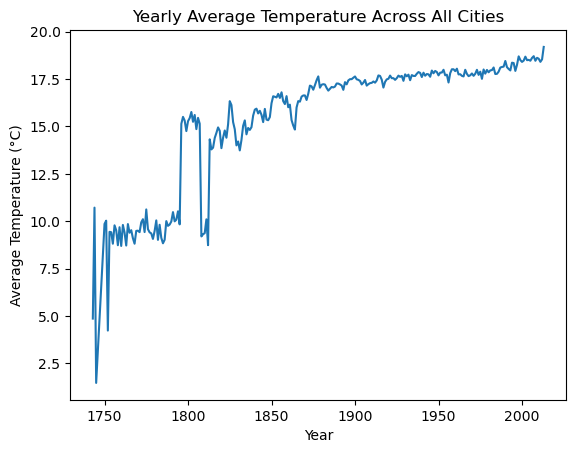

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# load the temperature data into a pandas DataFrame
temp_data = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCity.csv')

# convert the 'Date' column to a pandas DatetimeIndex
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
temp_data.set_index('Date', inplace=True)

# calculate the yearly average temperature for each city
city_year_avg_temp = temp_data.groupby(['City', temp_data.index.year])['Avg_Temperature'].mean()

# calculate the overall yearly average temperature across all cities
overall_year_avg_temp = city_year_avg_temp.groupby(city_year_avg_temp.index.get_level_values(1))\
    .mean()

# plot the yearly average temperature over time using a line plot
plt.plot(overall_year_avg_temp.index, overall_year_avg_temp)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature Across All Cities')
plt.show()


In [4]:
#2. analysis the byCountry dataset
import pandas as pd

df = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCountry.csv')

# convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract year from Date column and add as new column
df['Year'] = df['Date'].dt.year

# group data by Country and Year and calculate the mean of Avg_Temperature column
country_year_avg_temp = df.groupby(['Country', 'Year'])['Avg_Temperature'].mean().reset_index()

# set index to ['Country', 'Year']
country_year_avg_temp.set_index(['Country', 'Year'], inplace=True)

# number of unique countries in the dataset
num_countries = df['Country'].nunique()
print("Number of countries in the dataset: ", num_countries)

# print the resulting dataframe
print(country_year_avg_temp)
# write the dataframe to a CSV file
country_year_avg_temp.to_csv('country_year_avg_temp.csv')


Number of countries in the dataset:  243
                  Avg_Temperature
Country     Year                 
Afghanistan 1838        17.708125
            1840        13.413455
            1841        13.997600
            1842        15.154667
            1843        13.756250
...                           ...
Åland       2009         6.489083
            2010         4.861917
            2011         7.170750
            2012         6.063917
            2013         6.229750

[46003 rows x 1 columns]


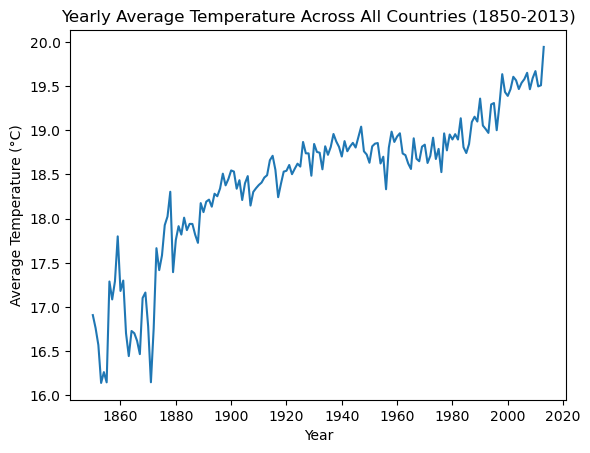

In [5]:
#aveage temperature from 1850 to 2013
import pandas as pd
import matplotlib.pyplot as plt

# load the temperature data into a pandas DataFrame
temp_data = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCountry.csv')

# convert the 'Date' column to a pandas DatetimeIndex
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
temp_data.set_index('Date', inplace=True)

# calculate the yearly average temperature for each Country
country_year_avg_temp = temp_data.groupby(['Country', temp_data.index.year])['Avg_Temperature'].mean()

# calculate the overall yearly average temperature across all cities
overall_year_avg_temp = country_year_avg_temp.groupby(country_year_avg_temp.index.get_level_values(1))\
    .mean()

# filter the overall_year_avg_temp DataFrame to include only years after 1849
overall_year_avg_temp_filtered = overall_year_avg_temp.loc[1850:]

# plot the filtered yearly average temperature over time using a line plot
plt.plot(overall_year_avg_temp_filtered.index, overall_year_avg_temp_filtered)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature Across All Countries (1850-2013)')
plt.show()


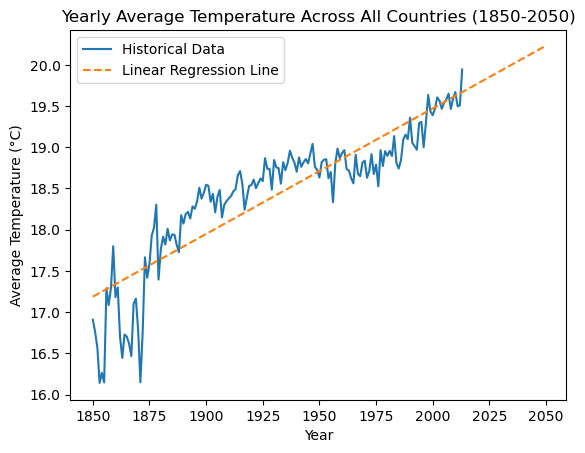

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load the temperature data into a pandas DataFrame
temp_data = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCountry.csv')

# convert the 'Date' column to a pandas DatetimeIndex
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
temp_data.set_index('Date', inplace=True)

# calculate the yearly average temperature for each Country
country_year_avg_temp = temp_data.groupby(['Country', temp_data.index.year])['Avg_Temperature'].mean()

# calculate the overall yearly average temperature across all cities
overall_year_avg_temp = country_year_avg_temp.groupby(country_year_avg_temp.index.get_level_values(1)).mean()

# filter the overall_year_avg_temp DataFrame to include only years after 1849
overall_year_avg_temp_filtered = overall_year_avg_temp.loc[1850:]

# create a linear regression model using the filtered data
X = overall_year_avg_temp_filtered.index.values.reshape(-1, 1)
y = overall_year_avg_temp_filtered.values
reg = LinearRegression().fit(X, y)

# predict the temperature for the next 30 years
future_years = pd.Series(range(1850, 2050)) # Changed the starting year to 2023
future_years_pred = reg.predict(future_years.values.reshape(-1, 1))

# plot the filtered yearly average temperature over time using a line plot
plt.plot(overall_year_avg_temp_filtered.index, overall_year_avg_temp_filtered, label='Historical Data')
plt.plot(future_years, future_years_pred, linestyle='--', label='Linear Regression Line') 
# Corrected the variables
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature Across All Countries (1850-2050)')
plt.legend()
plt.show()

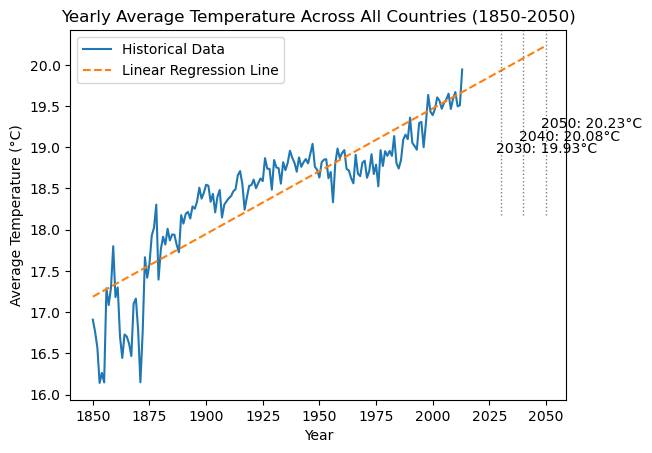

In [31]:
# predict the temperature for the next 30 years
future_years = pd.Series(range(1850, 2050)) # Changed the starting year to 2023
future_years_pred = reg.predict(future_years.values.reshape(-1, 1))

# plot the filtered yearly average temperature over time using a line plot
plt.plot(overall_year_avg_temp_filtered.index, overall_year_avg_temp_filtered, label='Historical Data')
plt.plot(future_years, future_years_pred, linestyle='--', label='Linear Regression Line') 

# draw vertical lines at years 2030, 2040, and 2050 and annotate the predicted temperature
for year in [2030, 2040, 2050]:
    temp_pred = reg.predict([[year]])[0]
    plt.axvline(x=year, linestyle=':', linewidth=1, color='gray', ymin=0.5, ymax=1.5)
    plt.annotate(f"{year}: {temp_pred:.2f}°C", xy=(year, temp_pred), 
                 xytext=(year - 2, temp_pred - 1),
                 )

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Yearly Average Temperature Across All Countries (1850-2050)')
plt.legend()
plt.show()

In [7]:
#3. analysis the byState dataset
import pandas as pd

df = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByState.csv')

# convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract year from Date column and add as new column
df['Year'] = df['Date'].dt.year

# group data by Country and Year and calculate the mean of Avg_Temperature column
country_year_avg_temp = df.groupby(['State', 'Year'])['Avg_Temperature'].mean().reset_index()

# set index to ['Country', 'Year']
country_year_avg_temp.set_index(['State', 'Year'], inplace=True)

# number of unique countries in the dataset
num_countries = df['State'].nunique()

# filter the dataframe to include only United States country
us_country = df[df['Country'] == 'United States']

# get the list of states that are only in United States country
us_states = us_country['State'].unique()

# filter the country_year_avg_temp dataframe to include only the states in us_states list
us_states_avg_temp = country_year_avg_temp.loc[us_states]

# print the number of states in the United States
num_us_states = len(us_states)
print("Number of States in the United States: ", num_us_states)

# print the resulting dataframe
print(us_states_avg_temp)

# filter the dataframe to include only United States country
us_country = df[df['Country'] == 'United States']

# get the list of states that are only in United States country
us_states = us_country['State'].unique()

# filter the country_year_avg_temp dataframe to include only the states in us_states list
us_states_avg_temp = country_year_avg_temp.loc[us_states]

# print the resulting dataframe
print(us_states_avg_temp)


Number of States in the United States:  51
              Avg_Temperature
State   Year                 
Alabama 1743        10.722000
        1744        18.451000
        1745        10.895750
        1750        17.653364
        1751        18.363500
...                       ...
Wyoming 2009         5.199917
        2010         5.756417
        2011         5.312250
        2012         7.306167
        2013         8.041111

[12073 rows x 1 columns]
              Avg_Temperature
State   Year                 
Alabama 1743        10.722000
        1744        18.451000
        1745        10.895750
        1750        17.653364
        1751        18.363500
...                       ...
Wyoming 2009         5.199917
        2010         5.756417
        2011         5.312250
        2012         7.306167
        2013         8.041111

[12073 rows x 1 columns]


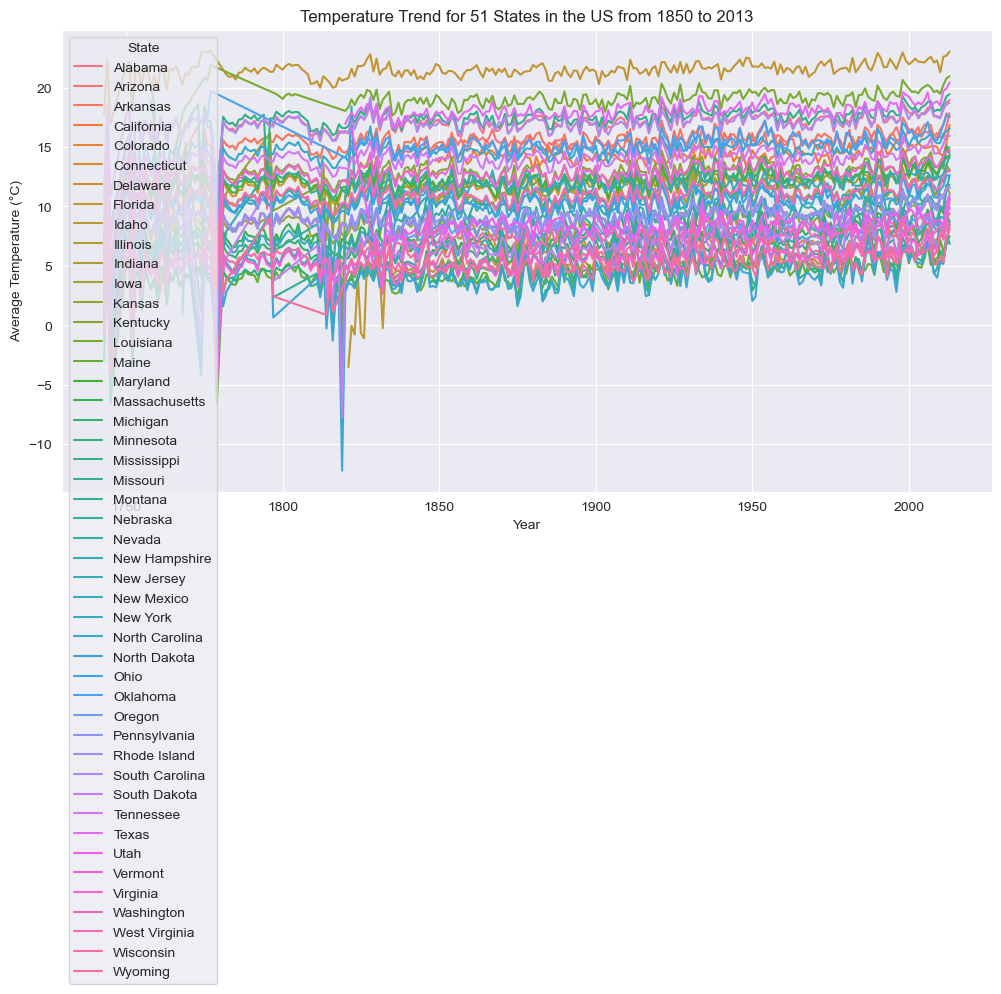

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the cleaned dataset
df = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByState.csv')

# convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract year from Date column and add as new column
df['Year'] = df['Date'].dt.year

# group data by State and Year and calculate the mean of Avg_Temperature column
state_year_avg_temp = df.groupby(['State', 'Year'])['Avg_Temperature'].mean().reset_index()

# filter the data for the 51 States in the US
us_states = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
             'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
             'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
us_states_avg_temp = state_year_avg_temp[state_year_avg_temp['State'].isin(us_states)]

# create a line plot with seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Avg_Temperature', hue='State', data=us_states_avg_temp)
plt.title('Temperature Trend for 51 States in the US from 1850 to 2013')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()


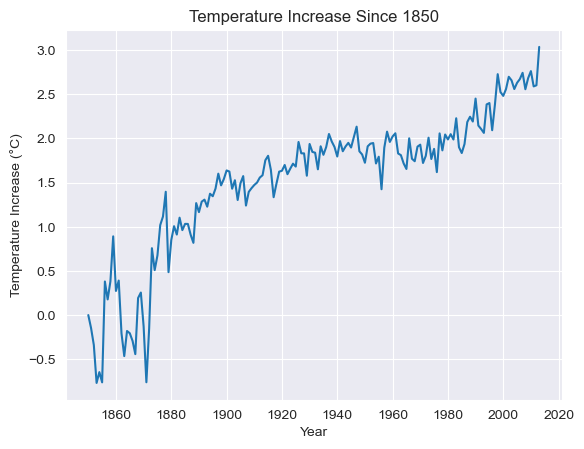

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# load the temperature data into a pandas DataFrame
temp_data = pd.read_csv(r'C:\Users\john8\Desktop\python\projet dataset\clean project dataset\cleaned_GlobalLandTemperaturesByCountry.csv')

# convert the 'Date' column to a pandas DatetimeIndex
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
temp_data.set_index('Date', inplace=True)

# calculate the yearly average temperature for each Country
country_year_avg_temp = temp_data.groupby(['Country', temp_data.index.year])['Avg_Temperature'].mean()

# calculate the overall yearly average temperature across all cities
overall_year_avg_temp = country_year_avg_temp.groupby(country_year_avg_temp.index.get_level_values(1)).mean()

# calculate the average temperature in 1850
temp_1850 = overall_year_avg_temp.loc[1850]

# subtract the average temperature in 1850 from the overall yearly average temperature
overall_year_avg_temp = overall_year_avg_temp - temp_1850

# filter the overall_year_avg_temp DataFrame to include only years after 1849
overall_year_avg_temp_filtered = overall_year_avg_temp.loc[1850:]

# plot the filtered yearly average temperature over time using a line plot
plt.plot(overall_year_avg_temp_filtered.index, overall_year_avg_temp_filtered)
plt.xlabel('Year')
plt.ylabel('Temperature Increase (°C)')
plt.title('Temperature Increase Since 1850')
plt.show()

overall_year_avg_temp_filtered.to_csv('temperature_increase_since_1850.csv')
